# Solving non-linear equations
Solving non-linear equations is a fundamental task in scientific computing and engineering. Unlike linear equations, non-linear equations involve variables raised to powers, products of variables, or transcendental functions such as exponentials, logarithms, and trigonometric functions. These equations often do not have closed-form solutions and require iterative numerical methods to find roots.

In this notebook, we focus on scalar non-linear equations, which involve a single unknown variable. Common techniques for solving such equations include the bisection method, fixed point iterations, Newton-Raphson method, and secant method. These methods are implemented in scientific libraries such as SciPy, making it straightforward to apply them to a wide range of problems. We will look into these methods here. 

## Summary of Convergence of Sequences

A sequence is said to converge if its terms approach a specific value, called the limit, as the sequence progresses. Formally, a 
sequence $(x_n)$ converges to a limit $L$ if for every $\epsilon > 0$, there exists an integer $N$ such that for all $n \geq N$, $|x_n - L| < \epsilon$.

Key points:
- **Convergent sequence:** Approaches a finite limit.
- **Divergent sequence:** Does not approach any finite limit.
- **Squeeze (Sandwich) Theorem:** If a sequence is bounded above and below by two sequences that converge to the same limit, then it also converges to that limit.
Convergence is fundamental in analysis and underpins many numerical methods for solving equations and optimization problems.

### Algebraic Rules for Limits

- **Sum Rule:** $\displaystyle \lim_{n \to \infty} (a_n + b_n) = \lim_{n \to \infty} a_n + \lim_{n \to \infty} b_n$
- **Difference Rule:** $\displaystyle \lim_{n \to \infty} (a_n - b_n) = \lim_{n \to \infty} a_n - \lim_{n \to \infty} b_n$
- **Product Rule:** $\displaystyle \lim_{n \to \infty} (a_n b_n) = \left(\lim_{n \to \infty} a_n\right) \left(\lim_{n \to \infty} b_n\right)$
- **Quotient Rule:** $\displaystyle \lim_{n \to \infty} \frac{a_n}{b_n} = \frac{\lim_{n \to \infty} a_n}{\lim_{n \to \infty} b_n}$, provided $\lim_{n \to \infty} b_n \neq 0$
- **Constant Multiple Rule:** $\displaystyle \lim_{n \to \infty} (c a_n) = c \lim_{n \to \infty} a_n$ for any constant $c$

These rules allow us to compute limits of complex sequences by breaking them down into simpler components.

### Theorem: Limit of a Function at a Point

Let $f(x)$ be defined on an open interval containing $a$ (except possibly at $a$ itself). We say that $\displaystyle \lim_{x \to a} f(x) = L$ if for every $\epsilon > 0$, there exists a $\delta > 0$ such that whenever $0 < |x - a| < \delta$, it follows that $|f(x) - L| < \epsilon$.

This theorem formalizes the concept of a function approaching a value $L$ as $x$ approaches $a$, and is foundational for calculus and analysis.

## Introduction to the Bisection Method

The bisection method is a simple and robust numerical technique for finding roots of a continuous function. It is based on the Intermediate Value Theorem, which states that if a continuous function changes sign over an interval \([a, b]\), then there exists at least one root in that interval.

The method works by repeatedly dividing the interval in half and selecting the subinterval where the function changes sign. This process is continued until the interval is sufficiently small, and the midpoint is taken as an approximation of the root.

**Key features:**
- Guaranteed convergence if the function is continuous and the initial interval brackets a root.
- Slow but reliable; the interval decreases by half with each iteration.
- Does not require derivatives or complex calculations.

The bisection method is often used as a starting point for more advanced root-finding algorithms or when reliability is more important than speed.

### Concept: $f(a)f(b) < 0$

For the bisection method to work, the function $f(x)$ must be continuous on the interval $[a, b]$, and the values at the endpoints must satisfy $f(a)f(b) < 0$. This condition ensures that $f(a)$ and $f(b)$ have opposite signs, indicating that there is at least one root in the interval due to the Intermediate Value Theorem.

### Bisection Method Algorithm

1. **Choose interval $[a, b]$** such that $f(a)f(b) < 0$.
2. **Compute midpoint:** $c = \frac{a + b}{2}$.
3. **Evaluate $f(c)$:**
    - If $f(c) = 0$, then $c$ is the root.
    - If $f(a)f(c) < 0$, set $b = c$.
    - If $f(b)f(c) < 0$, set $a = c$.
4. **Repeat steps 2–3** until the interval $[a, b]$ is sufficiently small (i.e., $|b - a| < \epsilon$ for some tolerance $\epsilon$).
5. **Return $c$** as the approximate root.

In [1]:
import numpy as np
def bisection_method(f, a, b, tol=1e-6, max_iter=100, verbose=False):
    """
    Find a root of the function f in the interval [a, b] using the bisection method.

    Parameters:
        f : function
            The function for which to find the root.
        a, b : float
            The interval in which to search for the root. Must satisfy f(a)*f(b) < 0.
        tol : float, optional
            The tolerance for stopping (default is 1e-6).
        max_iter : int, optional
            Maximum number of iterations (default is 100).

    Returns:
        float
            Approximate root location.
    """
    intervals=[]
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) and f(b) must have opposite signs.")
    if verbose:
        print(f"Starting bisection method on interval [{a}, {b}] with tolerance {tol}")
        intervals.append((a, b))
    for i in range(max_iter):
        c = (a + b) / 2.0
        if abs(f(c)) < tol or abs(b - a) < tol:
            if verbose:
                print(f"Converged in {i} iterations.")
            return c, intervals
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
        if verbose:
            print(f"Iteration {i}: [{a}, {b}], f(c)={f(c)}")
            intervals.append((a, b))
    if verbose:
        print("Maximum iterations reached.")
    return (a + b) / 2.0, intervals

## Example: 
Solving $f(x) = x - \cos(x) - 1 = 0$ Using the Bisection Method

Let's find a root of the equation \( x - \cos(x) - 1 = 0 \) using the bisection method.

### Step 1: Define the Function

Let $ f(x) = x - \cos(x) - 1 $.

### Step 2: Choose an Interval

We need to choose an interval \([a, b]\) such that \( f(a)f(b) < 0 \).  
For example, evaluating at \( x = 1 \) and \( x = 2 \):

- $ f(1) = 1 - \cos(1) - 1 \approx -0.54  $
- $ f(2) = 2 - \cos(2) - 1 \approx 1.42  $

Since  $ f(1) < 0 $ and  $ f(2) > 0 $, the interval  $[1, 2]$ brackets a root.

### Step 3: Apply the Bisection Method

We can use the `bisection_method` function to find the root in  $[1, 2]$:

```python
import numpy as np

def f(x):
    return x - np.cos(x) - 1

root = bisection_method(f, 1, 2)
print(f"Approximate root: {root}")
```

### Step 4: Interpretation

The output will give an approximate value of  $ x $ where  $ x - \cos(x) - 1 = 0 $.  
This demonstrates how the bisection method can be used to solve non-linear equations numerically.

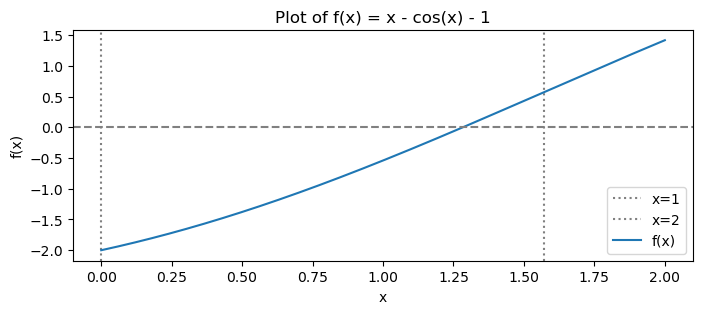

In [2]:
import matplotlib.pyplot as plt
def f(x):
    return x - np.cos(x) - 1
    

x_vals = np.linspace(0, 2, 400)
y_vals = f(x_vals)
plt.figure(figsize=(8, 3))
plt.axvline(0, color='grey', linestyle=':', label='x=1')
plt.axvline(np.pi/2, color='grey', linestyle=':', label='x=2')
plt.plot(x_vals, y_vals, label='f(x)')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = x - cos(x) - 1')
plt.legend()
plt.show()

f(0) = -2.0  # Should be negative
f(np.pi/2) = 0.5707963267948966  # Should be positive
Starting bisection method on interval [0, 1.5707963267948966] with tolerance 1e-07
Iteration 0: [0.7853981633974483, 1.5707963267948966], f(c)=-0.9217086177890993
Iteration 1: [1.1780972450961724, 1.5707963267948966], f(c)=-0.20458618726891742
Iteration 2: [1.1780972450961724, 1.3744467859455345], f(c)=0.17935646392940607
Iteration 3: [1.2762720155208536, 1.3744467859455345], f(c)=-0.014012661733608711
Iteration 4: [1.2762720155208536, 1.325359400733194], f(c)=0.08237922082992988
Iteration 5: [1.2762720155208536, 1.3008157081270237], f(c)=0.03410295065212532
Iteration 6: [1.2762720155208536, 1.2885438618239387], f(c)=0.010024172438885648
Iteration 7: [1.282407938672396, 1.2885438618239387], f(c)=-0.0019995985388756576
Iteration 8: [1.282407938672396, 1.2854759002481675], f(c)=0.004010962322409606
Iteration 9: [1.282407938672396, 1.2839419194602817], f(c)=0.0010053490032262413
Iteration 10: [1.283174

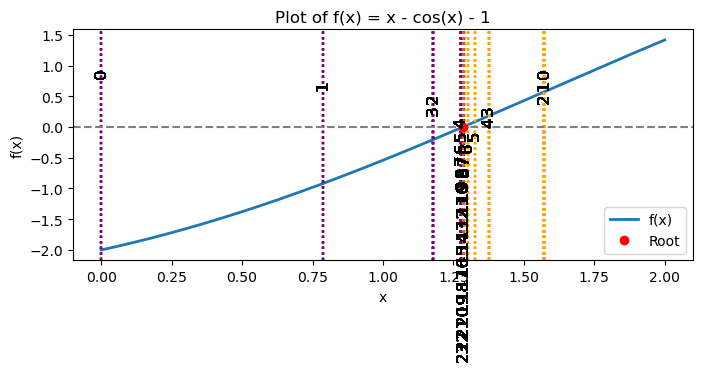

In [3]:

print(f"f(0) = {f(0)}  # Should be negative")
print(f"f(np.pi/2) = {f(np.pi/2)}  # Should be positive")
tol=1e-7
root,intervals = bisection_method(f, 0, np.pi/2, tol=tol, verbose=True)
print(f"Approximate root: {root} err: {f(root)} ")
plt.figure(figsize=(8, 3))
plt.plot(x_vals, y_vals, label='f(x)', linewidth=2)
for left, right in intervals:
	plt.axvline(left, color='purple', linestyle=':', alpha=0.5)
	for idx, (left, right) in enumerate(intervals):
		plt.axvline(left, color='purple', linestyle=':', alpha=0.5)
		plt.text(left, plt.ylim()[1]/2-0.2*idx, f'{idx}', color='black', fontsize=12, ha='center', va='bottom', rotation=90)
		plt.axvline(right, color='orange', linestyle=':', alpha=0.5)
		plt.text(right, plt.ylim()[1]/2-0.2*idx, f'{idx}', color='black', fontsize=12, ha='center', va='bottom', rotation=90)
plt.axhline(0, color='gray', linestyle='--')
plt.plot(root, f(root), 'ro', label='Root')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = x - cos(x) - 1')
plt.legend()
plt.show()

**Tasks** Change the tolerance and see how the number of iterations changes. Can you time the root finding as function of tolerance. 

### Example 3 p151


To solve the equation $f(x) = e^x - 5x + 2 = 0$ using the bisection method, we first select an interval $[a, b]$ where the function changes sign. 


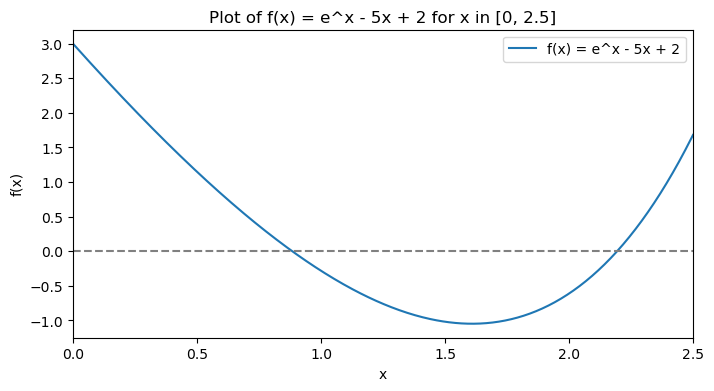

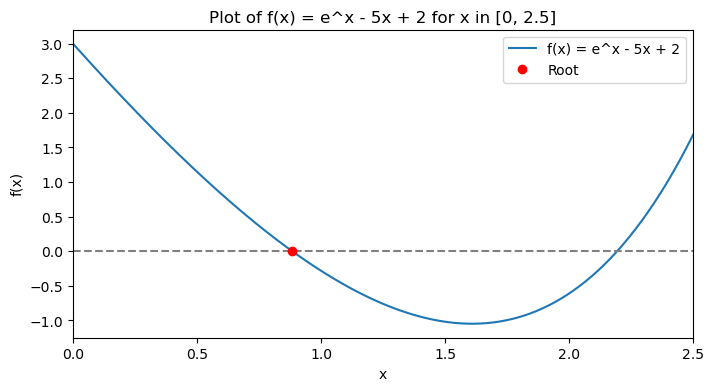

In [4]:
from numpy import exp

def f_ex3(x):
    return np.exp(x) - 5*x + 2

x_vals = np.linspace(0, 2.5, 400)
y_vals = f_ex3(x_vals)
plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_vals, label='f(x) = e^x - 5x + 2')
plt.axhline(0, color='gray', linestyle='--')
plt.xlim(0, 2.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = e^x - 5x + 2 for x in [0, 2.5]')
plt.legend()
plt.show()

tol=1e-7
a=0
b=1.5
root, intervals = bisection_method(f_ex3, a, b, tol=tol,verbose=False)
plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_vals, label='f(x) = e^x - 5x + 2')
plt.axhline(0, color='gray', linestyle='--')
plt.plot(root, f_ex3(root), 'ro', label='Root') 
plt.xlim(0, 2.5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) = e^x - 5x + 2 for x in [0, 2.5]')
plt.legend()
plt.show()

**Tasks** Can you find the other root?

### Sensitivity to initial interval
The bisection method's performance and the root it finds can depend strongly on the initial interval chosen. For functions with multiple roots, such as $f(x) = \cos(\pi x)$, different intervals may lead to convergence to different roots. Below, we illustrate how varying the starting interval affects the outcome and demonstrate the sensitivity of the method to this choice. This highlights the importance of understanding the function's behavior and carefully selecting the interval to ensure the desired root is found.

Let's start by plotting the function 
$$
f(x)= \cos(\pi x)
$$

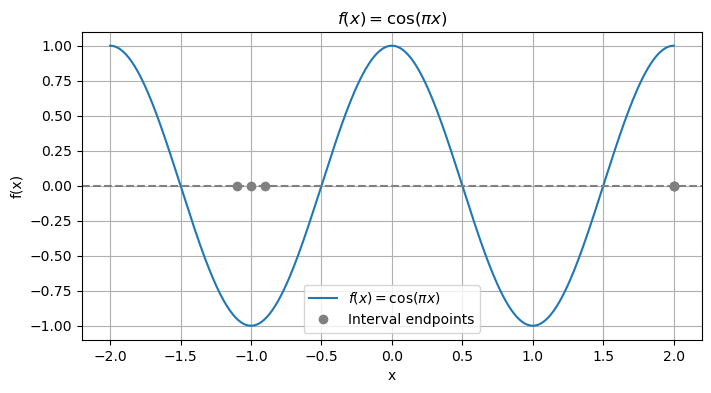

In [5]:
import numpy as np

import matplotlib.pyplot as plt

def f_cos_pi_x(x):
    return np.cos(np.pi * x)

# Plot f(x) = cos(pi x) to visualize roots
x_vals = np.linspace(-2, 2, 400)
y_vals = f_cos_pi_x(x_vals)
plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_vals, label=r'$f(x) = \cos(\pi x)$')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('$f(x) = \cos(\pi x)$')

interval1=(-1, 2)   
interval2=(-0.9, 2)
interval3=(-1.1, 2)
plt.plot([interval1[0], interval1[1]], [0, 0], 'o', color='gray', label='Interval endpoints')
plt.plot([interval2[0], interval2[1]], [0, 0], 'o', color='gray')
plt.plot([interval3[0], interval3[1]], [0, 0], 'o', color='gray')

plt.legend()
plt.grid(True)
plt.show()



Root initial interval (-1, 2): 0.5 (cos(pi*0.5)=6.123233995736766e-17)
Root initial interval (-0.9, 2): 1.4999999910593032 (cos(pi*1.4999999910593032)=-2.8088028087247043e-08)
Root initial interval (-1.1, 2): -0.5000000178813935 (cos(pi*-0.5000000178813935)=-5.617605441360006e-08)


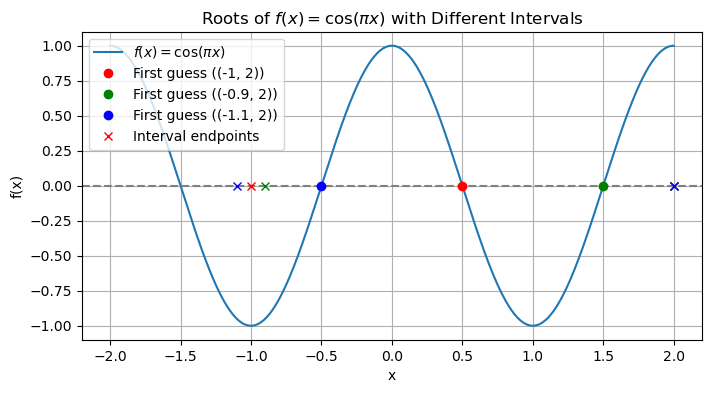

In [6]:

# Tolerance for root finding
tol = 1e-7

# Intervals
interval1=(-1, 2)   
interval2=(-0.9, 2)
interval3=(-1.1, 2)


root1,_ = bisection_method(f_cos_pi_x, interval1[0], interval1[1], tol=tol,verbose=False)
print(f"Root initial interval {interval1}: {root1} (cos(pi*{root1})={f_cos_pi_x(root1)})")


# Interval near x=1 root
root2,_ = bisection_method(f_cos_pi_x, interval2[0], interval2[1], tol=tol,verbose=False)
print(f"Root initial interval {interval2}: {root2} (cos(pi*{root2})={f_cos_pi_x(root2)})")


# Interval near x=1 root
root3,_ = bisection_method(f_cos_pi_x, interval3[0], interval3[1], tol=tol,verbose=False)
print(f"Root initial interval {interval3}: {root3} (cos(pi*{root3})={f_cos_pi_x(root3)})")

# Show roots on plot
plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_vals, label=r'$f(x) = \cos(\pi x)$')
plt.axhline(0, color='gray', linestyle='--')
plt.plot(root1, f_cos_pi_x(root1), 'ro', label=f'First guess ({interval1})')
plt.plot(root2, f_cos_pi_x(root2), 'go', label=f'First guess ({interval2})')
plt.plot(root3, f_cos_pi_x(root3), 'bo', label=f'First guess ({interval3})')

plt.plot([interval1[0], interval1[1]], [0, 0], 'x', color='r', label='Interval endpoints')
plt.plot([interval2[0], interval2[1]], [0, 0], 'x', color='g')
plt.plot([interval3[0], interval3[1]], [0, 0], 'x', color='b')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Roots of $f(x) = \cos(\pi x)$ with Different Intervals')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

 
**Tasks** 

- Can you explain why this small change in the initial interval causes a change in which root we end up at? 
- Will this change if you move the initial lowest $x$-values closer to $-1$? 

## Introduction to Fixed Point Iterations

Fixed point iteration is a fundamental numerical method for solving equations of the form $x = g(x)$. The idea is to start with an initial guess and repeatedly apply the function $g$ to generate a sequence that (hopefully) converges to a solution, called a fixed point.

A fixed point of a function $g(x)$ is a value $x^*$ such that $x^* = g(x^*)$. Many root-finding problems can be reformulated in this way, making fixed point iteration a versatile tool.

**Algorithm:**
1. Choose an initial guess $x_0$.
2. Compute $x_{n+1} = g(x_n)$.
3. Repeat step 2 until $|x_{n+1} - x_n|$ is less than a specified tolerance.

**Key Points:**
- Convergence depends on the properties of $g(x)$ and the choice of initial guess.
- If $|g'(x^*)| < 1$ near the fixed point, the iteration is likely to converge.
- Fixed point iteration is simple to implement but may converge slowly or fail if the function is not well-behaved.

Fixed point methods are widely used in numerical analysis and serve as the basis for more advanced algorithms, such as Newton's method and successive over-relaxation.

In [7]:
#This cell defines a function to create cobweb plots for iterative functions.
# It uses matplotlib for plotting and numpy for numerical operations.

# Use LaTeX throughout the figure for consistency
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 16})
#c('text', usetex=True)
# Figure dpi
dpi = 72
from ipywidgets import interact, widgets, Layout
def plot_cobweb(f, r, x0, xmax=1, nmax=40, title=None):
    """Make a cobweb plot.

    Plot y = f(x; r) and y = x for 0 <= x <= 1, and illustrate the behaviour of
    iterating x = f(x) starting at x = x0. r is a parameter to the function.

    """
    x = np.linspace(0, xmax, 500)
    fig = plt.figure(figsize=(800/dpi, 450/dpi), dpi=dpi)
    ax = fig.add_subplot(111)

    # Plot y = f(x) and y = x
    ax.plot(x, f(x, r), c='black', lw=4)
    ax.plot(x, x, c='grey', lw=2)

    # Iterate x = f(x) for nmax steps, starting at (x0, 0).
    # px, py = np.empty((2,nmax+1,2))
    # px[0], py[0] = x0, 0
    # for n in range(1, nmax, 2):
    #     px[n] = px[n-1]
    #     py[n] = f(px[n-1], r)
    #     px[n+1] = py[n]
    #     py[n+1] = py[n]
    #px, py = np.empty((2,nmax+1,2))
    px=[]
    py=[]
    x=x0
    y=f(x0,r)
    px.append(x0)
    py.append(0)
    px.append(x0)
    py.append(f(x0,r))
    
    for n in range(1, nmax):
        x=y
        px.append(x)
        py.append(y)
        
        y=f(x,r)
        px.append(x)
        py.append(y)
        
        # px[n] = px[n-1]
        # py[n] = f(px[n-1], r)
        # px[n+1] = py[n]
        # py[n+1] = py[n]
    # Plot the path traced out by the iteration.
    ax.plot(px, py, c='b', alpha=0.7)
    if title is not None:
        ax.set_title(title)
    plt.show()
    # Annotate and tidy the plot.
#    ax.minorticks_on()
#    ax.grid(which='minor', alpha=0.5)
#    ax.grid(which='major', alpha=0.5)
#    ax.set_aspect('equal')
#    ax.set_xlabel('$x$')
#    ax.set_ylabel(f.latex_label)
#    ax.set_title('$x_0 = {:.1}, r = {:.2}$'.format(x0, r))
#
#    plt.savefig('cobweb_{:.1}_{:.2}.png'.format(x0, r), dpi=dpi)



#### Example

For the quadratic map $x_{n+1} = r x_n^2$, the stability depends on the parameter $r$ and the derivative at the fixed point. Stability analysis helps predict the long-term behavior of the iteration.
$$
x_{n+1}=rx^2_n
$$

The fixed points of the quadratic map $x_{n+1} = r x_n^2$ are found by solving $x = r x^2$:

- $x^* = 0$
- $x^* = \frac{1}{r}$ (for $r \neq 0$)

**Stability Analysis:**

A fixed point $x^*$ is stable if $|f'(x^*)| < 1$, where $f(x) = r x^2$ and $f'(x) = 2 r x$.

- At $x^* = 0$: $f'(0) = 0$ (always stable)
- At $x^* = \frac{1}{r}$: $f'\left(\frac{1}{r}\right) = 2 r \cdot \frac{1}{r} = 2$

Since $|2| > 1$, the fixed point $x^* = \frac{1}{r}$ is always unstable.

**Summary:**

- $x^* = 0$ is stable for all $r$
- $x^* = \frac{1}{r}$ is unstable for all $r$

In [8]:

func_xr = lambda x,r: r*x**2


def interactive_cob_xr(r= 2, x0=0.5, nmax=1):
    plot_cobweb(func_xr, r= r, x0=x0, xmax=1/r, nmax=nmax, title=f'Cobweb plot for $f(x) = {r}x^2$')

coblayout=Layout(width='10cm')

interact(interactive_cob_xr, r=widgets.FloatSlider(min=0.3, max=3.9, step=0.1, value=1., description='r:',
                                  continuous_update=False,layout=coblayout,readout=True, readout_format='.1f'),
            x0=widgets.Dropdown(
                options=[0.1, 0.25, 0.5, 0.75,.9],
                value=0.5,
                description='x0:',
                disabled=False,),
            nmax=widgets.IntSlider(min=1, max=20, step=1, value=1, description='n:',
                                  continuous_update=False,layout=coblayout,readout=True, readout_format='.0f')
             )

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='r:', layout=Layout(width='1…

<function __main__.interactive_cob_xr(r=2, x0=0.5, nmax=1)>

### Cobweb Plot Example: Fixed Point Iteration for $x = \cos(x) + 1$

To solve the equation $x = \cos(x) + 1$ using fixed point iteration, we define the iteration function:
$$
g(x) = \cos(x) + 1
$$
We start with an initial guess $x_0$ and repeatedly apply $g(x)$ to generate the sequence $x_{n+1} = g(x_n)$.

Below is a cobweb plot illustrating the fixed point iteration for $x = \cos(x) + 1$:



In [9]:

func_xr1 = lambda x,r: r*np.cos(x)+1


def interactive_cob_xr(r= 1, x0=0.5, nmax=1):
    plot_cobweb(func_xr1, r= r, x0=x0, xmax=2.5, nmax=nmax, title=f'Cobweb plot for $f(x) = {r}\cos(x) + 1$')

coblayout=Layout(width='10cm')

interact(interactive_cob_xr, r=widgets.FloatSlider(min=0.3, max=3.9, step=0.1, value=1., description='r:',
                                  continuous_update=False,layout=coblayout,readout=True, readout_format='.1f'),
            x0=widgets.Dropdown(
                options=[0.1, 0.25, 0.5, 0.75,.9],
                value=0.5,
                description='x0:',
                disabled=False,),
            nmax=widgets.IntSlider(min=1, max=20, step=1, value=1, description='n:',
                                  continuous_update=False,layout=coblayout,readout=True, readout_format='.0f')
             )

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='r:', layout=Layout(width='1…

<function __main__.interactive_cob_xr(r=1, x0=0.5, nmax=1)>

## Example logistic map
The logistic map is a classic example of how simple nonlinear dynamical systems can exhibit a rich variety of behaviors, including stability, periodicity, and chaos. It is defined by the recurrence relation:

$$
x_{n+1} = r x_n (1 - x_n)
$$

where $x_n$ is a number between 0 and 1 representing the population at generation $n$, and $r$ is a parameter controlling the growth rate. As $r$ varies, the logistic map transitions from stable fixed points to periodic cycles and eventually to chaotic dynamics. This makes it a fundamental model in the study of discrete-time population dynamics and chaos theory.


In [10]:

r_vals=[2.9,3.1, 3.2, 3.4491,3.54409, 3.55644]
#logist_plot(3.79946,0.5,xmax)
func_logist = lambda x,r: r*x*(1-x)
def interactive_cob_logist(r= 2, x0=0.5, nmax=4):
    plot_cobweb(func_logist, r= r, x0=x0, xmax=1, nmax=nmax)

coblayout=Layout(width='9cm')
interact(interactive_cob_logist, r=widgets.SelectionSlider(options=r_vals, value=r_vals[0], description='r:',
                                  continuous_update=False, layout=coblayout, readout=True, readout_format='.5f'),
            x0=widgets.Dropdown(
                options=[0.1, 0.25, 0.5, 0.75],
                value=0.5,
                description='x0:',
                disabled=False,),
            nmax=widgets.IntSlider(min=1, max=20, step=1, value=1, description='n:',
                                  continuous_update=False, layout=coblayout, readout=True, readout_format='.0f')
             )



interactive(children=(SelectionSlider(continuous_update=False, description='r:', layout=Layout(width='9cm'), o…

<function __main__.interactive_cob_logist(r=2, x0=0.5, nmax=4)>

### Theorem: Convergence of Fixed Point Iterations
1. Let $g(x)$ be a continuous function on an interval $[a, b]$ and suppose that $g(x)$ maps $[a, b]$ into itself, i.e., $g(x) \in [a, b]$ for all $x \in [a, b]$. If there exists a constant $0 < k < 1$ such that
$$
|g(x) - g(y)| \leq k |x - y| \quad \text{for all } x, y \in [a, b],
$$
then $g(x)$ is called a contraction mapping, and the fixed point iteration
$$
x_{n+1} = g(x_n)
$$
will converge to the unique fixed point $x^*$ in $[a, b]$, regardless of the initial guess $x_0 \in [a, b]$.

2. If $g(x)$ is continuously differentiable on $[a, b]$ and there exists a constant $0 < k < 1$ such that
$$
|g'(x)| \leq k \quad \text{for all } x \in [a, b],
$$
then $g(x)$ is a contraction mapping. In this case, the fixed point iteration $x_{n+1} = g(x_n)$ will converge to the unique fixed point in $[a, b]$ for any initial guess $x_0 \in [a, b]$.


**Summary:**  
If $g(x)$ is a contraction on $[a, b]$, then the fixed point iteration converges to the unique fixed point in $[a, b]$.

### Fixed Point Iteration Forms for $ f(x) = e^x - 5x + 2 $

To solve $f(x) = e^x - 5x + 2 = 0$ using fixed point iteration, we rewrite the equation in the form $x = g(x)$. Here are several possible rearrangements:


1. $x = \dfrac{1}{5}(e^x + 2)$ with $g_1(x) = \dfrac{1}{5}(e^x + 2)$ and $g_1'(x) = \dfrac{1}{5}e^x$

2. $x = e^x - 4x + 2$ with $g_2(x) = e^x - 4x + 2$ with $g_2'(x) = e^x - 4$

3. $x = \ln(5x - 2)$ with  $g_3(x) = \ln(5x - 2)$  with  $g_3'(x) = \dfrac{5}{5x - 2}$ *(Valid only for $5x - 2 > 0$)*

---

Each form gives a different fixed point iteration scheme. The convergence depends on the choice of $g(x)$ and the initial guess. 

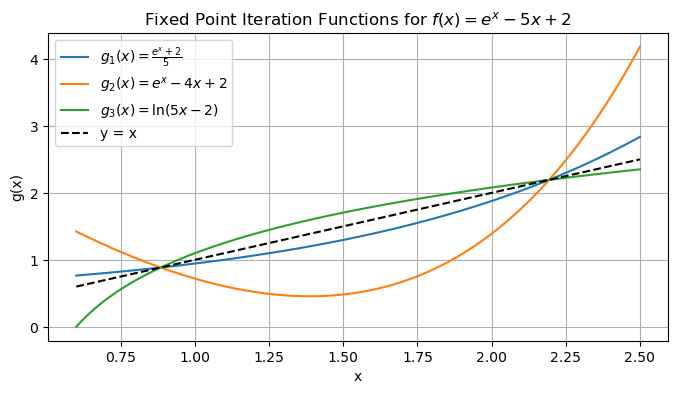

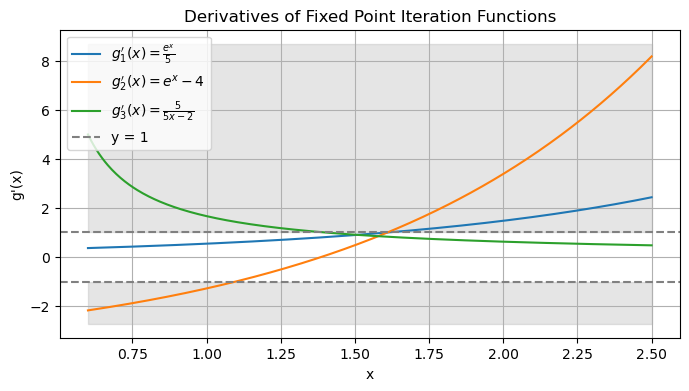

In [11]:
# Define the three fixed point iteration functions for f(x) = e^x - 5x + 2 = 0
def g1(x):
    return (np.exp(x) + 2) / 5

def g2(x):
    return np.exp(x) - 4 * x + 2

def g3(x):
    return np.log(5 * x - 2)

# PThe derivatives of g1, g2, g3
def dg1(x):
    return np.exp(x) / 5

def dg2(x):
    return np.exp(x) - 4

def dg3(x):
    return 5 / (5 * x - 2)

# Choose a domain where all functions are defined and real
x_plot = np.linspace(0.6, 2.5, 400)
plt.figure(figsize=(8, 4))

plt.plot(x_plot, g1(x_plot), label=r'$g_1(x) = \frac{e^x + 2}{5}$')
plt.plot(x_plot, g2(x_plot), label=r'$g_2(x) = e^x - 4x + 2$')
plt.plot(x_plot, g3(x_plot), label=r'$g_3(x) = \ln(5x - 2)$')
plt.plot(x_plot, x_plot, 'k--', label='y = x')

plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('Fixed Point Iteration Functions for $f(x) = e^x - 5x + 2$')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 4))


plt.plot(x_plot, dg1(x_plot), label=r"$g_1'(x) = \frac{e^x}{5}$")

plt.plot(x_plot, dg2(x_plot), label=r"$g_2'(x) = e^x - 4$")
plt.plot(x_plot, dg3(x_plot), label=r"$g_3'(x) =\frac{5}{5x - 2} $")
plt.axhline(1, color='gray', linestyle='--', label='y = 1')
plt.axhline(-1, color='gray', linestyle='--')
plt.fill_between(x_plot, 1, plt.ylim()[1], color='gray', alpha=0.2)
plt.fill_between(x_plot, plt.ylim()[0], -1, color='gray', alpha=0.2)
plt.xlabel('x')
plt.ylabel("g'(x)")
plt.title("Derivatives of Fixed Point Iteration Functions")
plt.legend()
plt.grid(True)
plt.show()

Let's make tables 

In [12]:
import pandas as pd

def fixed_point_iteration(g, x0, tol=1e-7, max_iter=15):
    results = []
    x = x0
    for i in range(max_iter):
        x_next = g(x)
        err = abs(x_next - x)
        results.append({'Iteration': i+1, 'x_n': x_next, 'Error': err})
        if err < tol:
            break
        x = x_next
    return pd.DataFrame(results)

x0 = 2.2 # initial guess in the book: 2.2. Try: 1.9, 1.0, 0.9, 0.6 

table_g1 = fixed_point_iteration(g1, x0, tol=tol)
table_g2 = fixed_point_iteration(g2, x0, tol=tol)
table_g3 = fixed_point_iteration(g3, x0, tol=tol)

combined_table = pd.DataFrame({
    'Iteration': table_g1['Iteration'],
    'g1(x)': table_g1['x_n'],
    'g2(x)': table_g2['x_n'],
    'g3(x)': table_g3['x_n']
})
print(combined_table)

    Iteration         g1(x)         g2(x)     g3(x)
0           1  2.205003e+00  2.225013e+00  2.197225
1           2  2.214055e+00  2.353554e+00  2.195681
2           3  2.230552e+00  3.108684e+00  2.194823
3           4  2.260999e+00  1.195682e+01  2.194344
4           5  2.318534e+00  1.558309e+05  2.194077
5           6  2.432154e+00           inf  2.193929
6           7  2.676674e+00           NaN  2.193846
7           8  3.307334e+00           NaN  2.193800
8           9  5.862444e+00           NaN  2.193774
9          10  7.071644e+01           NaN  2.193760
10         11  1.029886e+30           NaN  2.193752
11         12           inf           NaN  2.193747
12         13           inf           NaN  2.193745
13         14           inf           NaN  2.193743
14         15           inf           NaN  2.193743


/var/folders/mt/6thqwmbj5lvfz_9z7jnfcxt80000gn/T/ipykernel_81206/748069659.py:3: RuntimeWarning: overflow encountered in exp
  return (np.exp(x) + 2) / 5
/var/folders/mt/6thqwmbj5lvfz_9z7jnfcxt80000gn/T/ipykernel_81206/3845507111.py:8: RuntimeWarning: invalid value encountered in scalar subtract
  err = abs(x_next - x)
/var/folders/mt/6thqwmbj5lvfz_9z7jnfcxt80000gn/T/ipykernel_81206/748069659.py:6: RuntimeWarning: overflow encountered in exp
  return np.exp(x) - 4 * x + 2
/var/folders/mt/6thqwmbj5lvfz_9z7jnfcxt80000gn/T/ipykernel_81206/748069659.py:6: RuntimeWarning: invalid value encountered in scalar subtract
  return np.exp(x) - 4 * x + 2


**Tasks**: 

Try in addition to  $x_0=2.2$, set the initial guess to 1.9, 0.9, and 0.6. What do you notice?

## Introduction to Newton's Method

Newton's method, also known as the Newton-Raphson method, is a powerful and widely used technique for finding roots of real-valued functions. It is an iterative algorithm that leverages the function's derivative to rapidly converge to a solution.

Given a nonlinear equation $f(x) = 0$, Newton's method starts with an initial guess $x_0$ and generates a sequence of approximations using the formula:
$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$
where $f'(x_n)$ is the derivative of $f$ evaluated at $x_n$.

**Key features:**
- Typically converges much faster than methods like bisection or fixed point iteration, especially when the initial guess is close to the root.
- Requires the function to be differentiable and the derivative to be nonzero near the root.
- May fail to converge or diverge if the initial guess is poor or if the derivative is zero or changes rapidly.

Newton's method is fundamental in numerical analysis and is used in a wide range of scientific and engineering applications for solving nonlinear equations.

### Using Newton's Method to Find Square Roots

Newton's method provides an efficient way to compute square roots numerically. To find $\sqrt{c}$ for a given positive number $c$, we reformulate the problem as finding the root of the equation $f(x) = x^2 - c = 0$. Applying Newton's method, we start with an initial guess $x_0$ and iterate using:

$$
x_{n+1} = x_n - \frac{x_n^2 - c}{2x_n} = \frac{1}{2}\left(x_n + \frac{c}{x_n}\right)
$$

This iteration rapidly converges to $\sqrt{c}$, especially when the initial guess is reasonably close to the true value. Newton's method is widely used in numerical libraries for its speed and reliability in computing square roots.

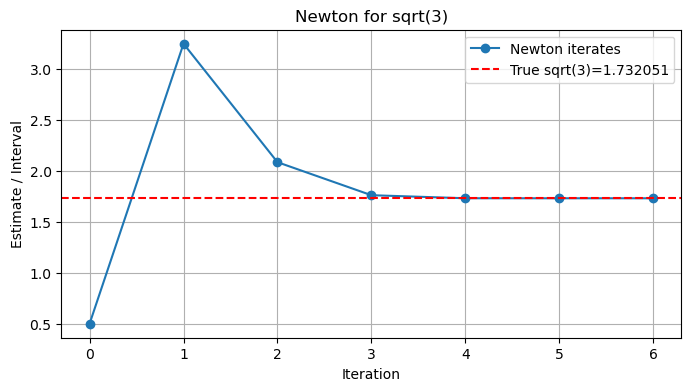

In [14]:
import matplotlib.pyplot as plt

def newton_sqrt(c, x0, tol=1e-7, max_iter=20):
    xs = [x0]
    for i in range(max_iter):
        x_next = 0.5 * (xs[-1] + c / xs[-1])
        xs.append(x_next)
        if abs(x_next - xs[-2]) < tol:
            break
    return xs

def f_sqrt(x):
    return x**2 - c

c=3 # Number to find the square root of
x0 = 1/ 2  # Initial guess

# Run Newton's method to get the iterates
xs = newton_sqrt(c, x0, tol=tol)

plt.figure(figsize=(8, 4))
plt.plot(xs, 'o-', label='Newton iterates')
plt.axhline(c**0.5, color='r', linestyle='--', label=f'True sqrt({c})={c**0.5:.6f}')

plt.xlabel('Iteration')
plt.ylabel('Estimate / Interval')
plt.title(f'Newton for sqrt({c})')
plt.legend()
plt.grid(True)
plt.show()



Let us compare with the bisect method. 

In [15]:
# First use verbose to see the iterations

root_bisect, intervals = bisection_method(f_sqrt, a=0, b=c, tol=tol, max_iter=7,verbose=True)
print(f"Bisection method root for sqrt({c}): {root_bisect:.8f}")
print(f"Newton's method last iterate: {xs[-1]:.8f}")
print(f"True sqrt({c}): {c**0.5:.8f}")


Starting bisection method on interval [0, 3] with tolerance 1e-07
Iteration 0: [1.5, 3], f(c)=-0.75
Iteration 1: [1.5, 2.25], f(c)=2.0625
Iteration 2: [1.5, 1.875], f(c)=0.515625
Iteration 3: [1.6875, 1.875], f(c)=-0.15234375
Iteration 4: [1.6875, 1.78125], f(c)=0.1728515625
Iteration 5: [1.6875, 1.734375], f(c)=0.008056640625
Iteration 6: [1.7109375, 1.734375], f(c)=-0.07269287109375
Maximum iterations reached.
Bisection method root for sqrt(3): 1.72265625
Newton's method last iterate: 1.73205081
True sqrt(3): 1.73205081


In [16]:

# Calculate errors for each Newton iteration
newton_errors = [abs(x - c**0.5) for x in xs]

# Calculate errors for each bisection interval
bisect_errors = [abs(0.5*(left+right)) - c**0.5 for left, right in intervals]

# Pad the shorter list with NaN so both columns have the same length
max_len = max(len(newton_errors), len(bisect_errors))
newton_errors += [float('nan')] * (max_len - len(newton_errors))
bisect_errors += [float('nan')] * (max_len - len(bisect_errors))

error_table = pd.DataFrame({
    'Iteration': range(1, max_len + 1),
    'Newton Error': newton_errors,
    'Bisection Error': bisect_errors
})

print(error_table)

   Iteration  Newton Error  Bisection Error
0          1  1.232051e+00        -0.232051
1          2  1.517949e+00         0.517949
2          3  3.544877e-01         0.142949
3          4  3.011243e-02        -0.044551
4          5  2.572856e-04         0.049199
5          6  1.910627e-08         0.002324
6          7  2.220446e-16        -0.021113
7          8           NaN        -0.009395


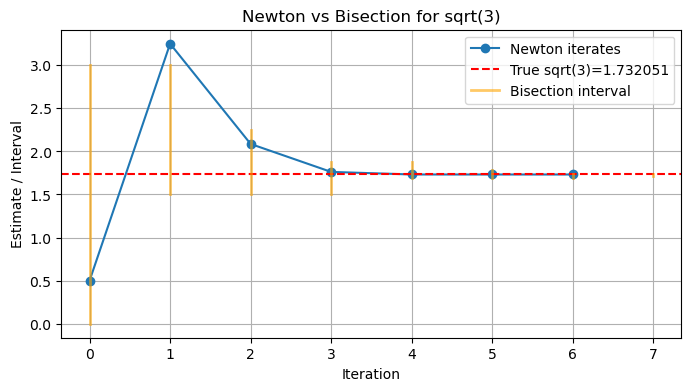

In [17]:
plt.figure(figsize=(8, 4))
plt.plot(xs, 'o-', label='Newton iterates')
plt.axhline(c**0.5, color='r', linestyle='--', label=f'True sqrt({c})={c**0.5:.6f}')
if intervals:
    for i, (left, right) in enumerate(intervals):
        plt.plot([i, i], [left, right], color='orange', lw=2, alpha=0.6, label='Bisection interval' if i == 0 else None)
plt.xlabel('Iteration')
plt.ylabel('Estimate / Interval')
plt.title(f'Newton vs Bisection for sqrt({c})')
set()
plt.legend()
plt.grid(True)
plt.show()


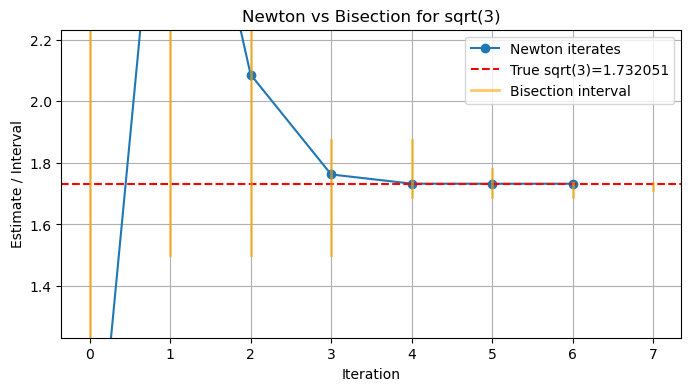

In [18]:
plt.figure(figsize=(8, 4))
plt.plot(xs, 'o-', label='Newton iterates')
plt.axhline(c**0.5, color='r', linestyle='--', label=f'True sqrt({c})={c**0.5:.6f}')
if intervals:
    for i, (left, right) in enumerate(intervals):
        plt.plot([i, i], [left, right], color='orange', lw=2, alpha=0.6, label='Bisection interval' if i == 0 else None)
plt.xlabel('Iteration')
plt.ylabel('Estimate / Interval')
plt.title(f'Newton vs Bisection for sqrt({c})')
plt.ylim(c**0.5 - 0.5, c**0.5 + 0.5)
plt.legend()
plt.grid(True)
plt.show()

### An example that diverges

Problems may arise if $f'(x)$ is very small. 

Looking at $tan^{−1} (x − 1) = \frac{1}{2}$ or $f(x)=tan^{−1} (x − 1)-\frac{1}{2}=0$
This function is plotted in the next figure. Notice how the derivative becomes almost zero if we're far away from origin. 
$$ 
f'(x)=\frac{1}{1+(x-1)^2}
$$


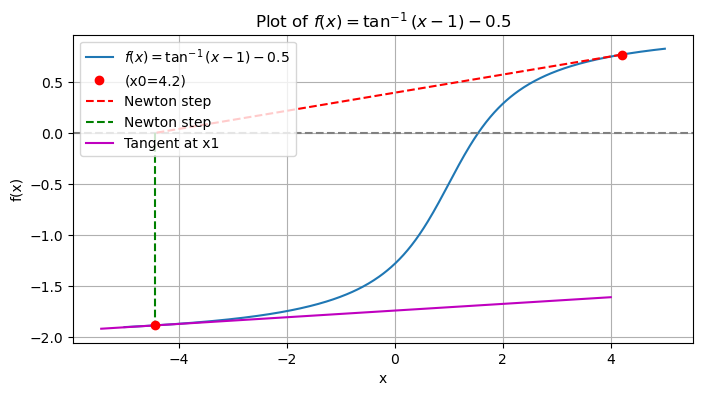

In [19]:
import numpy as np

import matplotlib.pyplot as plt

def f_tan(x):
    return np.arctan(x - 1) - 0.5

def newton_method_tan(x0, tol=1e-7, max_iter=10):
    xs = [x0]
    for i in range(max_iter):
        f_val = f_tan(xs[-1])
        df_val = 1 / (1 + (xs[-1] - 1)**2)
        x_next = xs[-1] - f_val / df_val
        xs.append(x_next)
        if abs(x_next - xs[-2]) < tol:
            break
    return xs

xs_newton = newton_method_tan(4.2, max_iter=6)
    
x_vals = np.linspace(-5, 5, 400)
y_vals = f_tan(x_vals)

plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_vals, label=r'$f(x) = \tan^{-1}(x-1) - 0.5$')
plt.axhline(0, color='gray', linestyle='--')
plt.plot(xs_newton[0], f_tan(np.array(xs_newton)[0]), 'ro', label="(x0=4.2)")
plt.plot([xs_newton[0], xs_newton[1]], [f_tan(xs_newton[0]), 0*f_tan(xs_newton[1])], 'r--', label='Newton step')
plt.plot([xs_newton[1], xs_newton[1]], [0*f_tan(xs_newton[1]), f_tan(xs_newton[1])], 'g--', label='Newton step')
# Plot tangent vector at xs_newton[1]
x1 = xs_newton[1]
y1 = f_tan(x1)
df1 = 1 / (1 + (x1 - 1)**2)
# Tangent line: y = y1 + df1*(x - x1)
x_tan = np.linspace(x1 - 1, 4, 50)
y_tan = y1 + df1 * (x_tan - x1)
plt.plot(x_tan, y_tan, 'm-', label='Tangent at x1')
plt.plot(xs_newton[1], f_tan(xs_newton[1]), 'ro-')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(r'Plot of $f(x) = \tan^{-1}(x-1) - 0.5$')
plt.legend()
plt.grid(True)
plt.show()

## Newton in higher dimensions

Newton's method can be extended to systems of nonlinear equations in multiple variables. Suppose we want to solve a vector equation $\mathbf{F}(\mathbf{x}) = \mathbf{0}$, where $\mathbf{F} : \mathbb{R}^n \to \mathbb{R}^n$ and $\mathbf{x} \in \mathbb{R}^n$. The multidimensional Newton iteration is:

$$
\mathbf{x}_{k+1} = \mathbf{x}_k - J_{\mathbf{F}}(\mathbf{x}_k)^{-1} \mathbf{F}(\mathbf{x}_k)
$$

where $J_{\mathbf{F}}(\mathbf{x}_k)$ is the Jacobian matrix of partial derivatives of $\mathbf{F}$ evaluated at $\mathbf{x}_k$.

**Key points:**
- The Jacobian $J_{\mathbf{F}}$ is an $n \times n$ matrix with entries $J_{ij} = \frac{\partial F_i}{\partial x_j}$.
- At each iteration, a linear system involving the Jacobian must be solved.
- Convergence is typically rapid if the initial guess is close to the solution and the Jacobian is nonsingular.
- Widely used in scientific computing for solving nonlinear systems, optimization, and inverse problems.


### Example: Intersection of an Ellipse and a Curve

We want to find the intersection points of the ellipse
$$
4x^2 + y^2 = 4
$$
and the curve
$$
x^2 y^3 = 1
$$



To find the intersection points of the ellipse $ 4x^2 + y^2 = 4 $ and the curve $ x^2 y^3 = 1 $, we need to solve the following system of nonlinear equations:

$$
F_1(x, y) = 4x^2 + y^2 - 4 = 0 \\
F_2(x, y) = x^2 y^3 - 1 = 0
$$

The solution $(x, y)$ gives the intersection points. In the next cell, we can implement Newton's method for this system.

The Jacobian matrix for this system is:

$$
J(x, y) =
\begin{bmatrix}
\displaystyle\frac{\partial F_1}{\partial x} & \displaystyle\frac{\partial F_1}{\partial y} \\[5mm]
\displaystyle\frac{\partial F_2}{\partial x} & \displaystyle\frac{\partial F_2}{\partial y}
\end{bmatrix}
=
\begin{bmatrix}
8x & 2y \\[2mm]
2x y^3 & 3x^2 y^2
\end{bmatrix}
$$

This matrix is used in Newton's method to update the guess for $(x, y)$ at each iteration.

Visualizing the functions can help us understand their behavior and the location of their intersection points. Below is a contour plot of both functions.

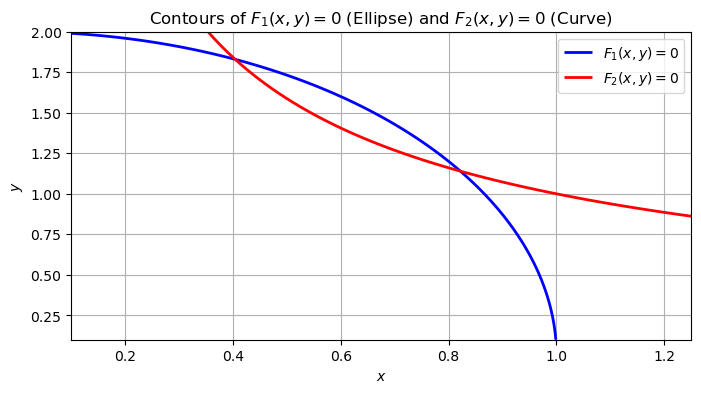

In [55]:

### Visualization of $F_1(x, y)$ and $F_2(x, y)$ in the First Quadrant
import numpy as np
x = np.linspace(0.1, 2, 400)
y = np.linspace(0.1, 2, 400)
X, Y = np.meshgrid(x, y)

F1 = 4*X**2 + Y**2 - 4
F2 = X**2 * Y**3 - 1

plt.figure(figsize=(8, 4))
contour1 = plt.contour(X, Y, F1, levels=[0], colors='blue', linewidths=2)
contour2 = plt.contour(X, Y, F2, levels=[0], colors='red', linewidths=2)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('Contours of $F_1(x, y) = 0$ (Ellipse) and $F_2(x, y) = 0$ (Curve)')
h1,_ = contour1.legend_elements()
h2,_ = contour2.legend_elements()
plt.legend([h1[0], h2[0]], ['$F_1(x, y)=0$', '$F_2(x, y)=0$'])
plt.xlim(0.1, 1.25)
plt.grid(True)
plt.show()


In [56]:
# Newton's method for solving the system F1(x, y) = 0, F2(x, y) = 0

def F(vec):
    x, y = vec
    return np.array([
        4*x**2 + y**2 - 4,
        x**2 * y**3 - 1
    ])

def J(vec):
    x, y = vec
    return np.array([
        [8*x, 2*y],
        [2*x*y**3, 3*x**2*y**2]
    ])

def newton_system(F, J, x0, tol=1e-8, max_iter=20, verbose=False):
    x = np.array(x0, dtype=float)
    for i in range(max_iter):
        F_val = F(x)
        if verbose:
            print(f"Iteration {i}: x={x}, F(x)={F_val}")
        if np.linalg.norm(F_val) < tol:
            if verbose:
                print(f"Converged in {i} iterations.")
            break
        J_val = J(x)
    
        delta = np.linalg.solve(J_val, -F_val)
        x = x + delta
    return x

# Initial guess (from the plot, try x=1, y=1)
root = newton_system(F, J, x0=[1, 1], tol=tol, verbose=True)
print(f"Intersection point: x={root[0]:.8f}, y={root[1]:.8f}")
print(f"F1(x, y)={F(root)[0]:.2e}, F2(x, y)={F(root)[1]:.2e}")

Iteration 0: x=[1. 1.], F(x)=[1. 0.]
Iteration 1: x=[0.85 1.1 ], F(x)=[ 0.1       -0.0383525]
Iteration 2: x=[0.82303701 1.13788562], F(x)=[ 0.00434333 -0.00199078]
Iteration 3: x=[0.8216852  1.13988818], F(x)=[ 1.13197518e-05 -5.35412769e-06]
Iteration 4: x=[0.82168163 1.13989352], F(x)=[ 7.96038790e-11 -3.74991149e-11]
Converged in 4 iterations.
Intersection point: x=0.82168163, y=1.13989352
F1(x, y)=7.96e-11, F2(x, y)=-3.75e-11


**Task:** Find the other solution.

## Example: Newton's Method for Optimization — The Rosenbrock Function

The Rosenbrock function is a classic test problem for optimization algorithms. It is defined as:

$$
f(x, y) = (1 - x)^2 + 100 (y - x^2)^2
$$

This function has a global minimum at $(x, y) = (1, 1)$, where $f(1, 1) = 0$. The Rosenbrock function is 
non-convex and features a narrow, curved valley, making it challenging for many optimization methods.

A **non-convex function** is a function whose graph does not form a single "bowl-shaped" curve. In mathematical terms, a function 
$f(x)$ is non-convex if there exist points $x_1$ and $x_2$ such that the line segment connecting $(x_1, f(x_1))$ and $(x_2, f(x_2))$ 
lies below the graph of $f(x)$ at some points. Non-convex functions can have multiple local minima and maxima, making optimization 
challenging because algorithms may get stuck in local minima rather than finding the global minimum.

The Rosenbrock function is non-convex because its valley curves and is surrounded by regions where the function increases, leading to multiple directions of steepest descent and making it difficult for optimization algorithms to find the global minimum efficiently.

In this example, we use Newton's method to find the minimum of the Rosenbrock function by iteratively updating the 
variables using the gradient and Hessian. This demonstrates how Newton's method can be applied to multidimensional optimization problems.

Lets first visualise the function:

In [57]:
import numpy as np

import plotly.graph_objs as go

# Rosenbrock function definition
def rosenbrock_surface(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Create grid
x = np.linspace(-2, 2, 200)
y = np.linspace(-1, 3, 200)
X, Y = np.meshgrid(x, y)
Z = rosenbrock_surface(X, Y)

# Create the figure first
fig = go.Figure(data=[go.Surface(z=Z, x=X, y=Y, colorscale='Viridis',
                                 contours = {
                                     "z": dict(
                                         show=True,
                                         usecolormap=True,
                                         highlightcolor="limegreen",
                                         project_z=True
                                     )
                                 },
                                 opacity=0.7
                                 )])
fig.update_layout(title='Rosenbrock Function Surface',
                  scene=dict(
                      xaxis_title='x',
                      yaxis_title='y',
                      zaxis_title='f(x, y)'
                  ),
                  autosize=False,
                  width=700, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()

### Gradient and Hessian of the Rosenbrock Function

For the Rosenbrock function:
$$
f(x, y) = (1 - x)^2 + 100 (y - x^2)^2
$$

**Gradient:**
$$
\nabla f(x, y) =
\begin{bmatrix}
\frac{\partial f}{\partial x} \\[5pt]
\frac{\partial f}{\partial y}
\end{bmatrix}
=
\begin{bmatrix}
-2(1 - x) - 400x(y - x^2) \\[5pt]
200(y - x^2)
\end{bmatrix}
$$

**Hessian:**
$$
H_f(x, y) =
\begin{bmatrix}
\frac{\partial^2 f}{\partial x^2} & \frac{\partial^2 f}{\partial x \partial y} \\[5pt]
\frac{\partial^2 f}{\partial y \partial x} & \frac{\partial^2 f}{\partial y^2}
\end{bmatrix}
=
\begin{bmatrix}
2 - 400y + 1200x^2 & -400x \\[5pt]
-400x & 200
\end{bmatrix}
$$

In [60]:
import numpy as np

def rosenbrock(x):
    # Rosenbrock function: f(x, y) = (1 - x)^2 + 100*(y - x^2)^2
    return np.array([
        (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2
    ])

def grad_rosenbrock(x):
    # Gradient of Rosenbrock function
    df_dx = -2*(1 - x[0]) - 400*x[0]*(x[1] - x[0]**2)
    df_dy = 200*(x[1] - x[0]**2)
    return np.array([df_dx, df_dy])

def hess_rosenbrock(x):
    # Hessian of Rosenbrock function
    d2f_dx2 = 2 - 400*x[1] + 1200*x[0]**2
    d2f_dxdy = -400*x[0]
    d2f_dy2 = 200
    return np.array([
        [d2f_dx2, d2f_dxdy],
        [d2f_dxdy, d2f_dy2]
    ])


def newton_optimize(f_grad, f_hess, x0, tol=1e-8, max_iter=20, verbose=True):
    x = np.array(x0, dtype=float)
    for i in range(max_iter):
        grad = f_grad(x)
        hess = f_hess(x)
        if verbose:
            print(f"Iter {i}: x={x}, grad={grad}")
        if np.linalg.norm(grad) < tol:
            print(f"Converged in {i} iterations.")
            break
        delta = np.linalg.solve(hess, -grad)
        x = x + delta
    return x

# Initial guess
x0 = [-1.2, 1.0]
optimum = newton_optimize(grad_rosenbrock, hess_rosenbrock, x0)
print(f"Minimum found at x={optimum}")
print(f"Function value at minimum: {rosenbrock(optimum)[0]}")

Iter 0: x=[-1.2  1. ], grad=[-215.6  -88. ]
Iter 1: x=[-1.1752809   1.38067416], grad=[-4.63781641 -0.12220679]
Iter 2: x=[ 0.76311487 -3.17503385], grad=[1146.45069037 -751.47563227]
Iter 3: x=[0.76342968 0.58282478], grad=[-4.73110379e-01 -1.98207786e-05]
Iter 4: x=[0.99999531 0.94402732], grad=[ 22.38520499 -11.19265967]
Iter 5: x=[0.9999957  0.99999139], grad=[-8.60863354e-06 -2.95541369e-11]
Iter 6: x=[1. 1.], grad=[ 7.41096051e-09 -3.70548037e-09]
Converged in 6 iterations.
Minimum found at x=[1. 1.]
Function value at minimum: 3.4326461875363225e-20


In [61]:
# Initial guess far from the minimum
x0 = [10.2, 10.0]
optimum = newton_optimize(grad_rosenbrock, hess_rosenbrock, x0)
print(f"Minimum found at x={optimum}")
print(f"Function value at minimum: {rosenbrock(optimum)[0]}")

Iter 0: x=[10.2 10. ], grad=[383701.6 -18808. ]
Iter 1: x=[ 10.19951087 104.0300218 ], grad=[ 1.83999978e+01 -4.78491472e-05]
Iter 2: x=[  1.00044017 -83.6220213 ], grad=[ 33864.06091998 -16924.58036622]
Iter 3: x=[1.00044014 1.00088048], grad=[8.80283386e-04 2.22044605e-13]
Iter 4: x=[1.         0.99999981], grad=[ 7.7489884e-05 -3.8744942e-05]
Iter 5: x=[1. 1.], grad=[-0.  0.]
Converged in 5 iterations.
Minimum found at x=[1. 1.]
Function value at minimum: 0.0


A list of other optimization methods:
- **Gradient Descent:** Iteratively moves in the direction of the negative gradient to find a local minimum.
- **Conjugate Gradient Method:** Efficient for large-scale optimization, especially for quadratic functions.
- **Quasi-Newton Methods (e.g., BFGS, L-BFGS):** Approximate the Hessian matrix to speed up convergence.
- **Secant Method:** Uses finite differences to approximate derivatives for optimization.
- **Simplex Method (Nelder-Mead):** Direct search method for unconstrained optimization without derivatives.
- **Genetic Algorithms:** Population-based stochastic optimization inspired by natural selection.
- **Simulated Annealing:** Probabilistic technique for global optimization.
- **Trust Region Methods:** Restrict the step size to a region where the model is trusted.
- **Coordinate Descent:** Optimizes one variable at a time, cycling through all variables.
- **Stochastic Gradient Descent:** Uses random subsets of data for each iteration, common in machine learning.
- **Interior Point Methods:** Used for constrained optimization problems.
- **Line Search Methods:** Find an optimal step size along a given direction.
- **Grid Search:** Evaluates the function on a grid of points (useful for low-dimensional problems).
- **Bracketing Methods (Golden Section Search, Brent’s Method):** Used for one-dimensional optimization without derivatives.

## The Secant method
The secant method is an iterative technique for finding roots of nonlinear equations, similar to Newton's method but without requiring the computation of derivatives. Instead, it approximates the derivative using two previous points, making it especially useful when the derivative of the function is difficult or expensive to evaluate.

Given a function $f(x)$ and two initial guesses $x_0$ and $x_1$, the secant method generates a sequence of approximations using the formula:
$$
x_{n+1} = x_n - f(x_n) \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})}
$$

**Key features:**
- Does not require explicit derivatives.
- Typically converges faster than the bisection method but may be less robust.
- Requires two initial guesses that ideally bracket the root or are close to it.

The secant method is widely used in scientific computing for solving nonlinear equations when derivative information is unavailable or unreliable.

Illustration of the method. Change _n_iter_ in the last line in the following cell and make sure you understand what's going on.

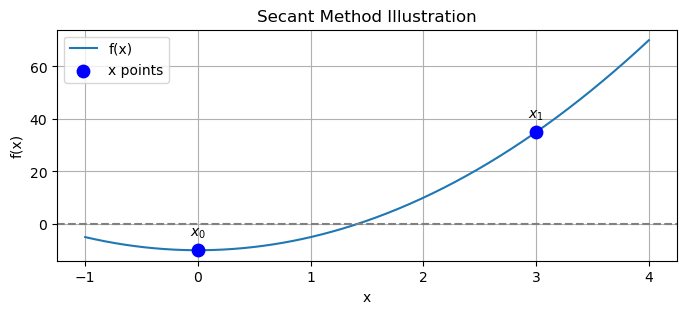

In [63]:
import matplotlib.pyplot as plt

def secant_method_plot(f, x0, x1, n_iter=5, x_range=None):
    xs = [x0, x1]
    for i in range(n_iter):
        f_x0, f_x1 = f(xs[-2]), f(xs[-1])
        x_next = xs[-1] - f_x1 * (xs[-1] - xs[-2]) / (f_x1 - f_x0)
        xs.append(x_next)
    # Plot function
    if x_range is None:
        x_min = min(xs) - 1
        x_max = max(xs) + 1
    else:
        x_min, x_max = x_range
    x_vals = np.linspace(x_min, x_max, 400)
    y_vals = f(x_vals)
    plt.figure(figsize=(8, 3))
    plt.plot(x_vals, y_vals, label='f(x)')
    plt.axhline(0, color='gray', linestyle='--')
    # Plot secant lines
    for i in range(1, len(xs)-1):
        x0, x1 = xs[i-1], xs[i]
        y0, y1 = f(x0), f(x1)
        plt.plot([x0, x1], [y0, y1], 'r--', lw=2, label='Secant' if i == 1 else None)
    # Highlight x-points
    plt.scatter(xs, [f(x) for x in xs], s=80, c='blue', zorder=5, label='x points')
    for i, x in enumerate(xs):
        plt.annotate(f'$x_{i}$', (x, f(x)), textcoords="offset points", xytext=(0,10), ha='center', fontsize=10)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Secant Method Illustration')
    plt.legend()
    plt.grid(True)
    plt.show()
    return xs

# Example usage:
def f_example(x):
    return 5*x**2 - 10

secant_method_plot(f_example, x0=0, x1=3, n_iter=0);

The **secant method** is closely related to Newton's method, but instead of using the exact derivative, it approximates the derivative using two previous iterates. This makes it derivative-free and often more practical when $f'(x)$ is difficult to compute.

The secant method has **superlinear convergence**: the error decreases faster than linear but not as fast as quadratic. Specifically, the order of convergence is the **golden ratio** $\varphi = \frac{1+\sqrt{5}}{2} \approx 1.618$:

$$
|e_{n+1}| \approx C |e_n|^{\varphi}
$$

where $C$ is a constant and $e_n$ is the error at step $n$. This means the secant method is faster than bisection (linear), but not as fast as Newton's method (quadratic), and the golden ratio is the theoretical limit for its convergence rate.


## Example: Estimating the Cooling Constant Using the Secant Method
In this example, we use real experimental data to estimate the cooling constant kkk in Newton’s law of cooling. The model describes how the temperature of an object changes over time as it cools toward the ambient temperature:
$$
T(t)=T_E+(T_0−T_E)e^{−kt} 
$$
where:

$T(t)$ is the temperature at time $t$,
$T_0$​ is the initial temperature,
$T_E$​ is the ambient (environment) temperature,
$k$ is the cooling constant to be determined.

We are given a table of temperature measurements at various times as a cup of coffee cools. Our goal is to find the value of $k$ that best fits the data, by minimizing the sum of squared differences between the observed and predicted temperatures.
To do this, we:

- Define a cost function (sum of squared errors) that measures the discrepancy between the model and the data.
- Compute the derivative of the cost function with respect to $k$.
- Apply the secant method to find the value of $k$ that minimizes the cost function.

This approach demonstrates how numerical optimization techniques can be used to fit nonlinear models to experimental data.

The data from _Turner_:

| Time $t$ (min) | Observed Temp $T_{\text{obs}}$ (°C) |
|:--------------:|:------------------------------------:|
|       0        |               93.50                  |
|       1        |               76.90                  |
|       2        |               65.90                  |
|       3        |               54.60                  |
|       4        |               45.30                  |
|       5        |               40.30                  |
|       6        |               37.90                  |
|       7        |               32.95                  |
|       8        |               30.99                  |
|       9        |               29.14                  |
|      10        |               28.14                  |
|      11        |               27.95                  |
|      12        |               26.54                  |
|      13        |               24.90                  |
|      14        |               25.38                  |
|      15        |               25.22                  |
|      16        |               25.07                  |
|      17        |               24.89                  |
|      18        |               24.81                  |
|      19        |               24.76                  |
|      20        |               24.63                  |

The cost function (sum of squared errors) and its derivative with respect to $k$ are:

**Cost function:**
$$
C(k) = \frac{1}{2}\sum_{i=1}^n \left[ T_E + (T_0 - T_E) e^{-k t_i} - T_{\text{obs},i} \right]^2
$$

**Derivative with respect to $k$:** This is $C'(k)$ with the correct parenthesis, the book has a typo
$$
C'(k) =  \sum_{i=1}^n \left[ T_E + (T_0 - T_E) e^{-k t_i} - T_{\text{obs},i} \right] \cdot \left[ -(T_0 - T_E) t_i e^{-k t_i} \right]
$$

These expressions are used to minimize the discrepancy between the model and the data by adjusting $k$.

Optimal k: 0.293233
Cost at optimal k: 8.4540


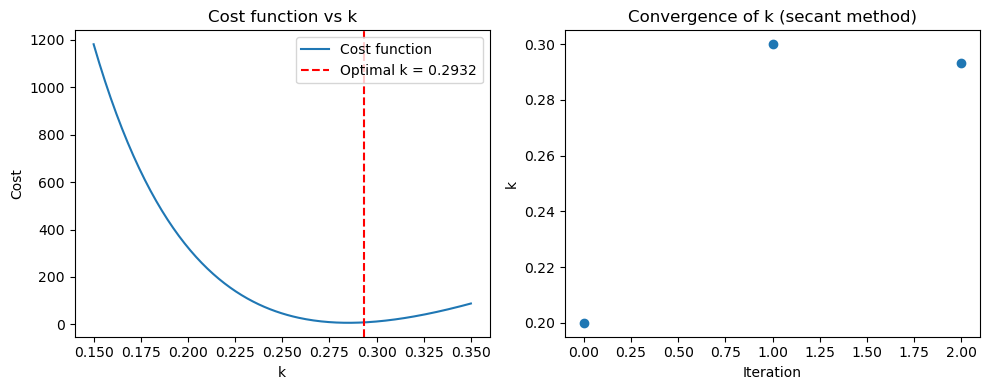

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Data from Turner et al.
t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])
T_obs = np.array([93.50, 76.9, 65.9, 54.6, 45.3, 40.3, 37.9, 32.95, 30.99, 29.14, 28.14, 27.95, 26.54, 24.90, 25.38, 25.22, 25.07, 24.89, 24.81, 24.76, 24.63])

T0 = T_obs[0]
TE = 24.5  # Ambient temperature
def model(t, k):
    return TE + (T0 - TE) * np.exp(-k * t)

def cost(k):
    return 0.5 * np.sum((model(t, k) - T_obs)**2)

def cost_derivative(k):
    # This is f'(k) with the correct parenthesis, the book has a typo
    return np.sum((model(t, k) - T_obs) * (-t * (T0 - TE) * np.exp(-k * t)))

# Secant method
def secant_method(f_prime, k0, k1, tol=1e-8, max_iter=100):
    ks = [k0, k1]
    for i in range(max_iter):
        f0 = f_prime(ks[-2])
        f1 = f_prime(ks[-1])
        if abs(f1 - f0) < 1e-12:
            break
        k_next = ks[-1] - f1 * (ks[-1] - ks[-2]) / (f1 - f0)
        ks.append(k_next)
        if abs(k_next - ks[-1]) < tol:
            break
    return ks

# Initial guesses
k0, k1 = 0.2, 0.3
ks = secant_method(cost_derivative, k0, k1)
k_opt = ks[-1]

print(f"Optimal k: {k_opt:.6f}")
print(f"Cost at optimal k: {cost(k_opt):.4f}")

# Plot cost function
k_vals = np.linspace(0.15, 0.35, 200)
cost_vals = [cost(k) for k in k_vals]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(k_vals, cost_vals, label='Cost function')
plt.axvline(k_opt, color='r', linestyle='--', label=f'Optimal k = {k_opt:.4f}')
plt.xlabel('k')
plt.ylabel('Cost')
plt.title('Cost function vs k')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(ks, 'o')
plt.xlabel('Iteration')
plt.ylabel('k')
plt.title('Convergence of k (secant method)')
plt.tight_layout()
plt.show()


**Tasks:**
- Plot the model prediction $T(t)$ using the optimal $k$ alongside the observed data. How well does the model fit?
- Add random noise to the observed temperatures $T_{\text{obs}}$ and repeat the estimation. How robust is the method to measurement errors?
- Try changing the initial guesses $k_0$ and $k_1$ for the secant method. How sensitive is the estimated cooling constant $k$ to your starting values?
- What happens if you have only half of the measurements, or one fourth?

## Comparing Convergence Speed and Timing: Bisection, Fixed Point, Newton, and Secant Methods

Let's solve the equation $ f(x) = x^3 - x - 2 = 0 $ using four different methods and compare their convergence speed and computation time.

We will use the following:
- **Bisection method**
- **Fixed point iteration** (with $ g(x) = (x+2)^{1/3} $)
- **Newton's method**
- **Secant method**

We will use the same initial guess or interval where possible and a tolerance of $ 1 \times 10^{-7} $.

**Check that the function changes sign in the interval for bisection:**

**check that $g(x)$ is a contraction in the interval for fixed point iteration.**

**check that the derivative is not too small for Newton's method.**
We need to ensure that $|f'(x)|$ is not too small at the initial guess to avoid division by zero or slow convergence.

**check that the initial guesses for the secant method are close enough.**
The initial guesses $x_0$ and $x_1$ should be close to each other and to the root for the secant method to work effectively.

----

In [65]:


import numpy as np
import time

# Function and its derivative
def f(x):
    return x**3 - x - 2

def df(x):
    return 3*x**2 - 1

# Fixed point iteration function
def g(x):
    return (x + 2)**(1/3)

# Bisection method
def bisection_method(f, a, b, tol=1e-7, max_iter=100):
    start = time.time()
    for i in range(max_iter):
        c = (a + b) / 2
        if abs(f(c)) < tol or abs(b - a) < tol:
            break
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    elapsed = time.time() - start
    return c, i+1, elapsed

# Fixed point iteration
def fixed_point(g, x0, tol=1e-7, max_iter=100):
    start = time.time()
    x = x0
    for i in range(max_iter):
        x_new = g(x)
        if abs(x_new - x) < tol:
            break
        x = x_new
    elapsed = time.time() - start
    return x_new, i+1, elapsed

# Newton's method
def newton_method(f, df, x0, tol=1e-7, max_iter=100):
    start = time.time()
    x = x0
    for i in range(max_iter):
        x_new = x - f(x)/df(x)
        if abs(x_new - x) < tol:
            break
        x = x_new
    elapsed = time.time() - start
    return x_new, i+1, elapsed

# Secant method
def secant_method(f, x0, x1, tol=1e-7, max_iter=100):
    start = time.time()
    for i in range(max_iter):
        if abs(f(x1) - f(x0)) < 1e-14:
            break
        x2 = x1 - f(x1)*(x1 - x0)/(f(x1) - f(x0))
        if abs(x2 - x1) < tol:
            break
        x0, x1 = x1, x2
    elapsed = time.time() - start
    return x2, i+1, elapsed

# Initial values
a, b = 1, 2
x0 = 1.5
x1 = 2.0

# Run all methods
root_bisect, n_bisect, t_bisect = bisection_method(f, a, b)
root_fp, n_fp, t_fp = fixed_point(g, x0)
root_newton, n_newton, t_newton = newton_method(f, df, x0)
root_secant, n_secant, t_secant = secant_method(f, x0, x1)

# Print results Notice the use of pandas for a nice table
import pandas as pd
results = pd.DataFrame({
    "Method": ["Bisection", "Fixed Point", "Newton", "Secant"],
    "Root": [root_bisect, root_fp, root_newton, root_secant],
    "Iterations": [n_bisect, n_fp, n_newton, n_secant],
    "Time (s)": [t_bisect, t_fp, t_newton, t_secant]
})
print(results)

        Method     Root  Iterations      Time (s)
0    Bisection  1.52138          22  1.287460e-05
1  Fixed Point  1.52138           8  1.907349e-06
2       Newton  1.52138           3  9.536743e-07
3       Secant  1.52138           5  3.814697e-06


**Interpretation:**
- Newton and secant methods typically converge in the fewest iterations and are fastest.
- Bisection is robust but slow.
- Fixed point iteration may converge slowly or not at all, depending on the function and initial guess.

**You can change the function or initial guesses to see how the methods behave in other scenarios.**


### Hybrid Root-Finding: Combining Bisection and Newton's Method

A common practical strategy is to start with the robust bisection method and switch to Newton's method when close enough to the root (e.g., when the interval is small and $|f'(x)|$ is not too small). This combines the guaranteed convergence of bisection with the fast convergence of Newton's method.

Below is an example implementation solving 
$
x^3-x-2=0
$:



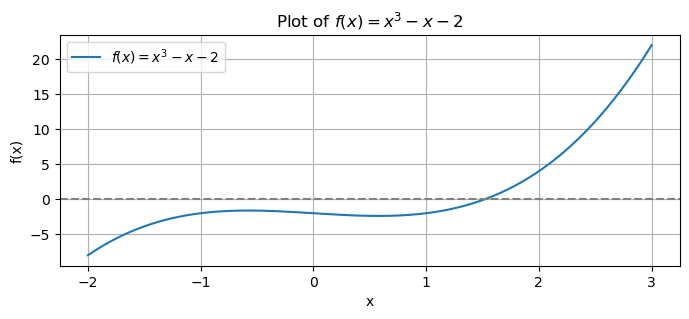

In [ ]:
def f(x):
    return x**3 - x - 2

def df(x):
    return 3*x**2 - 1

def bisection(f, a, b, tol=1e-5, max_iter=100):
    for i in range(max_iter):
        c = (a + b) / 2
        if abs(f(c)) < tol or (b - a) / 2 < tol:
            return c, i+1
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return c, max_iter

def newton(f, df, x0, tol=1e-10, max_iter=100):
    x = x0
    for i in range(max_iter):
        fx = f(x)
        dfx = df(x)
        if abs(fx) < tol:
            return x, i+1
        if dfx == 0:
            raise ValueError("Zero derivative encountered.")
        x = x - fx / dfx
    return x, max_iter

import matplotlib.pyplot as plt
x = np.linspace(-2, 3, 400)
y = f(x)
plt.figure(figsize=(8, 3))
plt.plot(x, y, label='$f(x) = x^3 - x - 2$')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of $f(x) = x^3 - x - 2$')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:
# Step 1: Use bisection to get close to the root
a, b = -10, 20
root_bisect, bisect_iters = bisection(f, a, b, tol=1e-2)
# Step 2: Use Newton's method starting from the bisection result
root_newton, newton_iters = newton(f, df, root_bisect)
# Step 3: Use bisection again with the same total number of iterations as Newton's method
root_bisect1, bisect_iters1 = bisection(f, a, b, tol=1e-16, max_iter=bisect_iters+newton_iters) # Bisect with same total iterations
# Run Bisection to the same tolerance for comparison
root_bisect_exact, bisect_iters_exact = bisection(f, a, b, tol=abs(f(root_newton)), max_iter=1000)

print(f"Bisection method: root ≈ {root_bisect:.13f} (in {bisect_iters} iterations) error: {abs(f(root_bisect)):.2e}")
print(f"Newton's method: root ≈ {root_newton:.13f} (in {newton_iters} iterations) error: {abs(f(root_newton)):.2e}\n")
print(f"Bisection same # iterations: root ≈ {root_bisect1:.13f} (in {bisect_iters1} iterations) error: {abs(f(root_bisect1)):.2e}\n")
print(f"Bisection to same tolerance: root ≈ {root_bisect_exact:.13f} (in {bisect_iters_exact} iterations) error: {abs(f(root_bisect_exact)):.2e}")

Bisection method: root ≈ 1.5209960937500 (in 12 iterations) error: 2.28e-03
Newton's method: root ≈ 1.5213797068046 (in 3 iterations) error: 5.77e-14

Bisection same # iterations: root ≈ 1.5219116210938 (in 15 iterations) error: 3.16e-03

Bisection to same tolerance: root ≈ 1.5213797068045 (in 49 iterations) error: 1.12e-13


**Explanation:**
- The method starts with bisection.
- When the interval is sufficiently small and the derivative is safe, it switches to Newton's method for rapid convergence.
- This approach is robust and efficient for many nonlinear equations.

**Task**

Can you combine Bisection and Newton to implement a robust method that can find the root of the diverging example above:
$f(x)=tan^{−1} (x − 1)-\frac{1}{2}=0$?